### EDA (Exploratory Data Analysis)
Luego del proceso de Extracción, Transformación y Carga (ETL) 
procederemos al Análisis Exploratorio de Datos (EDA)

## Importamos librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import calendar
import folium
from IPython.display import Image

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

## Cargamos los datos resultantes de ETL

In [4]:
homicidios_df = pd.read_csv('homicidios_cleaned.csv')
homicidios_df.head(3)

,id_siniestro,nro_victimas,fecha,franja_hora,tipo_calle,comuna,longitud,latitud,vehiculo_victima,vehiculo_acusado,rol,sexo,edad
0,2016-0001,1,2016-01-01,4.0,avenida,8,-58.47533969,-34.68757022,moto,auto,conductor,masculino,19.0
1,2016-0002,1,2016-01-02,1.0,gral paz,9,-58.50877521,-34.66977709,auto,pasajeros,conductor,masculino,70.0
2,2016-0003,1,2016-01-03,7.0,avenida,1,-58.39040293,-34.63189362,moto,auto,conductor,masculino,30.0


In [5]:
homicidios_df.shape

(717, 13)

In [6]:
# Obtener el conteo de nulos por columna de homicidios_df
null_count = homicidios_df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (homicidios_df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                  Nulos  Porcentaje
id_siniestro          0    0.000000
nro_victimas          0    0.000000
fecha                 0    0.000000
franja_hora           1    0.139470
tipo_calle            0    0.000000
comuna                0    0.000000
longitud              0    0.000000
latitud               0    0.000000
vehiculo_victima      9    1.255230
vehiculo_acusado     23    3.207810
rol                   0    0.000000
sexo                  0    0.000000
edad                 53    7.391911


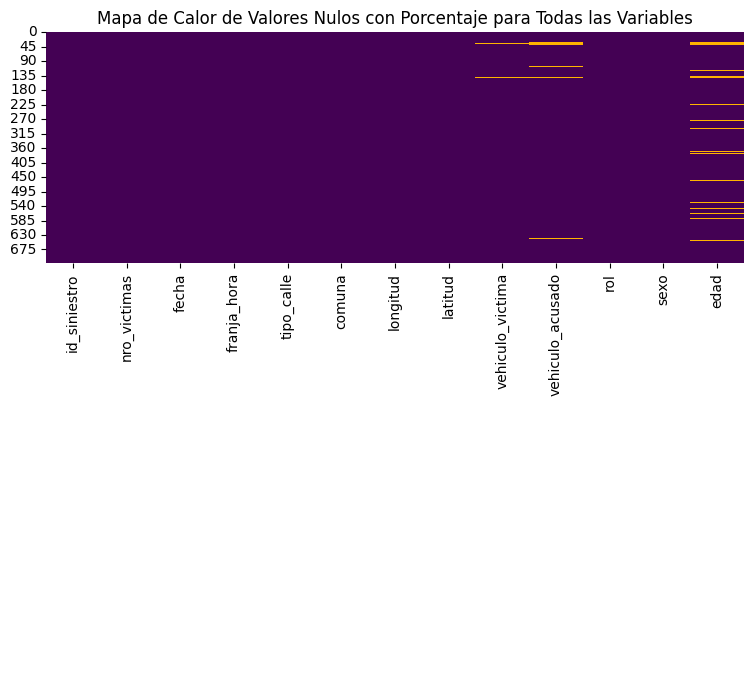

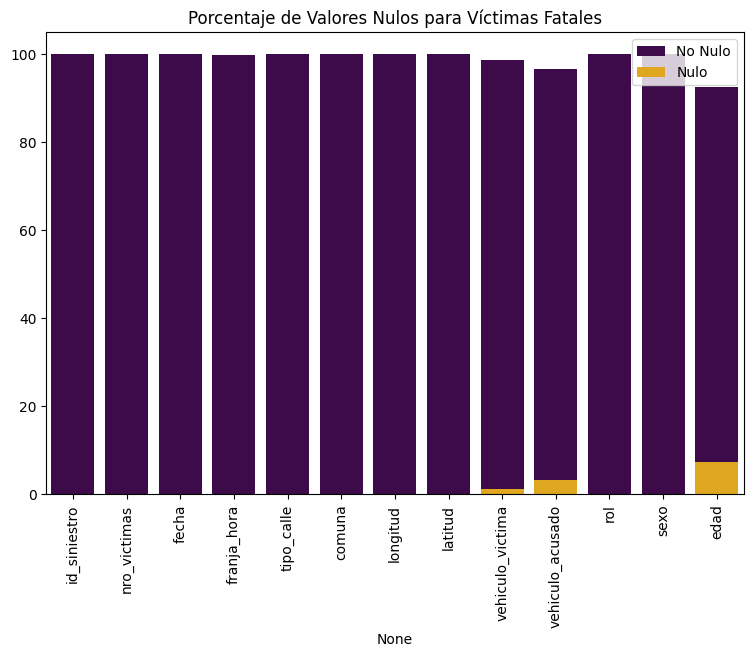

In [17]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = homicidios_df.isnull().mean() * 100

# Calcular el porcentaje de valores nulos por columna para víctimas fatales
porcentaje_nulos= homicidios_df.isnull().mean() * 100
# Crear una paleta de colores personalizada
cmap_custom = sns.color_palette(['#440154', '#FFB400'])

# Crear un mapa de calor (heatmap) de valores nulos con el porcentaje
plt.figure(figsize=(9, 3))
sns.heatmap(homicidios_df.isnull(), cbar=False, cmap=cmap_custom)

# Agregar el texto con el porcentaje de nulos en cada columna
for col, porcentaje in porcentaje_nulos.items():
    plt.text(homicidios_df.columns.get_loc(col) + 0.5, 1900, f'{porcentaje:.2f}%', rotation=90,
             va='center', ha='center', color='white')

plt.title('Mapa de Calor de Valores Nulos con Porcentaje para Todas las Variables')
plt.show()

# Crear la figura y los ejes para un solo gráfico
fig, ax = plt.subplots(figsize=(9, 6))

# Gráfico: Porcentaje de valores nulos para víctimas fatales
sns.barplot(x=porcentaje_nulos.index, y=100 - porcentaje_nulos.values, color=cmap_custom[0], label='No Nulo', ax=ax)
sns.barplot(x=porcentaje_nulos.index, y=porcentaje_nulos.values, color=cmap_custom[1], label='Nulo', ax=ax)
ax.set_title('Porcentaje de Valores Nulos para Víctimas Fatales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend()

# Mostrar la figura
plt.show()

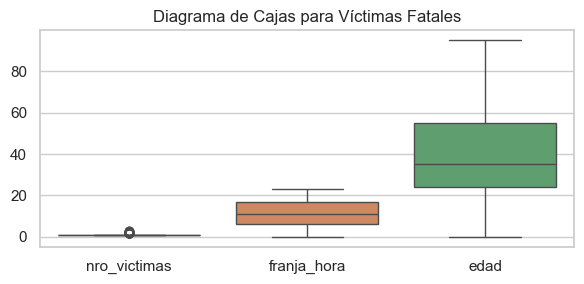

In [32]:
# Configurar la disposición de subgráficos
fig, axes = plt.subplots(1, 1, figsize=(6,3))

# Crear un diagrama de cajas para Víctimas Fatales
sns.boxplot(data=homicidios_df_filled, ax=axes)
axes.set_title('Diagrama de Cajas para Víctimas Fatales')

# Crear un diagrama de cajas para Lesionados


# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Como resultado del ETL , ralizando un analisis EDA poder ver que los datos estan listos para su uso